In [1]:
import csv
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

Using TensorFlow backend.


In [2]:
DS = pd.read_csv("ObjectSubset150SentenceLength.csv")

In [3]:
DS['tag'].fillna('text', inplace=True)

In [4]:
words = list(set(DS["word"].values))
n_words = len(words)
tags = list(set(DS["tag"].values))
n_tags = len(tags)

In [5]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("text_ID").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [6]:
getter = SentenceGetter(DS)
sentences = getter.sentences

In [7]:
DS.head()

,text_ID,word,tag
0,46809,RR,object
1,46809,130/80,object
2,46809,mmHg.,text
3,47482,"RR142/89mmHg,",object
4,47482,HR,text


In [8]:
sentences[1]

[('Pt.', 'text'),
 ('tehtud', 'text'),
 ('3', 'text'),
 ('plasmaferees,', 'text'),
 ('talus', 'text'),
 ('hästi.', 'text'),
 ('Eemaldatud', 'text'),
 ('700', 'text'),
 ('ml', 'text'),
 ('plasmat.', 'text'),
 ('RR', 'object'),
 ('112/60', 'object'),
 ('mmHg.', 'text'),
 ('Tgasi', 'text'),
 ('22.10.09.', 'text')]

In [9]:
max_len = 150
max_len_char = 10

In [10]:
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

In [11]:
tag2idx

{'object': 1, 'text': 2, 'PAD': 0}

In [12]:
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)

In [13]:
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1 #For predictions
char2idx["PAD"] = 0

In [14]:
idx2char = {i: w for w, i in char2idx.items()}

In [15]:
X_char = []
for sentence in sentences:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char.append(np.array(sent_seq))

In [16]:
y = [[tag2idx[w[1]] for w  in s] for s in sentences]


In [17]:
len(sentences)

13643

In [18]:
y = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')

In [19]:
X_char[1].shape

(150, 10)

In [20]:
tag2idx

{'object': 1, 'text': 2, 'PAD': 0}

In [21]:
from sklearn.model_selection import train_test_split
X_char_tr, X_char_te, y_tr,  y_te= train_test_split(X_char, y, test_size=0.2, random_state=2018)


In [22]:
char2idx

{'Ü': 2,
 '+': 3,
 '–': 4,
 'U': 5,
 '/': 6,
 ';': 7,
 'o': 8,
 '0': 9,
 '�': 10,
 'T': 11,
 '´': 12,
 'W': 13,
 'Õ': 14,
 'y': 15,
 ')': 16,
 'x': 17,
 'O': 18,
 'Y': 19,
 '2': 20,
 'ä': 21,
 'V': 22,
 'w': 23,
 'l': 24,
 'm': 25,
 'H': 26,
 'n': 27,
 'ö': 28,
 '>': 29,
 '½': 30,
 'p': 31,
 'e': 32,
 's': 33,
 'Ä': 34,
 'r': 35,
 'z': 36,
 '.': 37,
 '1': 38,
 '7': 39,
 '%': 40,
 '5': 41,
 'j': 42,
 'i': 43,
 '=': 44,
 'g': 45,
 '~': 46,
 'A': 47,
 'E': 48,
 'M': 49,
 'ˇ': 50,
 '[': 51,
 'k': 52,
 'D': 53,
 '(': 54,
 'd': 55,
 't': 56,
 '!': 57,
 'S': 58,
 '9': 59,
 'q': 60,
 'G': 61,
 'f': 62,
 'c': 63,
 '8': 64,
 'ü': 65,
 '?': 66,
 '_': 67,
 'Q': 68,
 'h': 69,
 'L': 70,
 '#': 71,
 'X': 72,
 ']': 73,
 '&': 74,
 'Ö': 75,
 '*': 76,
 '"': 77,
 'F': 78,
 ',': 79,
 'N': 80,
 '3': 81,
 'J': 82,
 '6': 83,
 'B': 84,
 '<': 85,
 '\\': 86,
 'R': 87,
 'I': 88,
 'b': 89,
 'š': 90,
 '°': 91,
 '4': 92,
 'Z': 93,
 '-': 94,
 'C': 95,
 '`': 96,
 "'": 97,
 'a': 98,
 'P': 99,
 ':': 100,
 'ž': 101,
 'K':

In [23]:
X_char[1]

array([[99, 56, 37, ...,  0,  0,  0],
       [56, 32, 69, ...,  0,  0,  0],
       [81,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [24]:
y_tr.shape

(10914, 150)

In [25]:
max_len_char

10

In [26]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Flatten, Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D


# input and embeddings for characters
char_in = Input(shape=(max_len,max_len_char))

emb = TimeDistributed(Embedding(input_dim=n_chars + 2, output_dim=20,
                           input_length=max_len_char))(input)
enc = TimeDistributed(LSTM(units=20, return_sequences=False,recurrent_dropout=0.5))(emb)
x = SpatialDropout1D(0.3)(enc)
model = Bidirectional(LSTM(units=20, return_sequences=True,
                               recurrent_dropout=0.5))(x)

out = TimeDistributed(Dense(n_tags + 1, activation="softmax"))(model)

model = Model( char_in, out)

In [27]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary(line_length=100)


Model: "model_1"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_1 (InputLayer)                         (None, 150, 10)                         0              
____________________________________________________________________________________________________
time_distributed_1 (TimeDistributed)         (None, 150, 10, 20)                     2120           
____________________________________________________________________________________________________
time_distributed_2 (TimeDistributed)         (None, 150, 20)                         3280           
____________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDropout1D)       (None, 150, 20)                         0              
__________________________________________________________________________

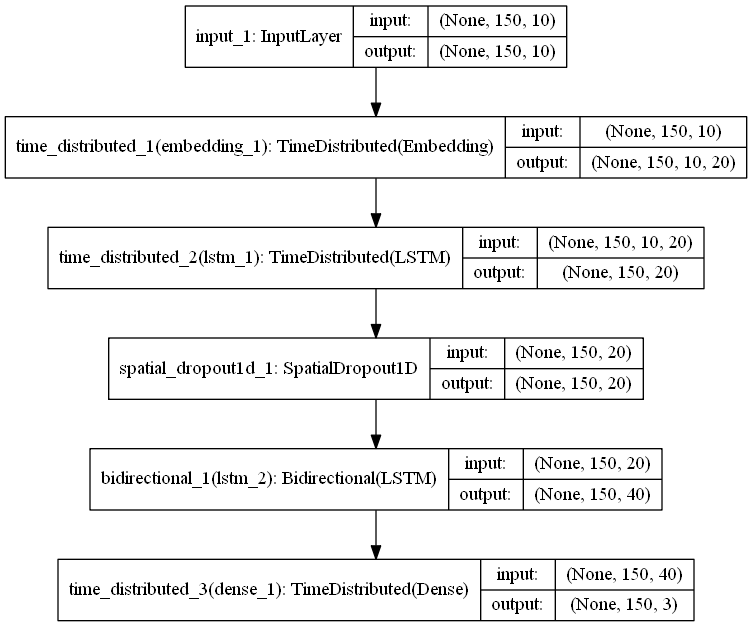

In [30]:

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='CharsEmbedding_Model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
a = np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))

In [30]:
a.shape

(10914, 150, 10)

In [31]:
X_char_tr[1].shape

(150, 10)

In [32]:
np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char)).shape

(10914, 150, 10)

In [33]:
from keras.callbacks import ModelCheckpoint

# Saving the best model only
filepath="CharacterEmbeddingObject-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the best model
history = model.fit(np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char)),
                    np.array(y_tr).reshape(len(y_tr), max_len, 1),
                    batch_size=32, epochs=10, validation_split=0.1, verbose=1,callbacks=callbacks_list)


C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9822 samples, validate on 1092 samples
Epoch 1/10
9822/9822 [==============================] - 77s 8ms/step - loss: 0.1363 - acc: 0.9700 - val_loss: 0.0276 - val_acc: 0.9912

Epoch 00001: val_acc improved from -inf to 0.99120, saving model to CharacterEmbeddingObject-0.99.hdf5
Epoch 2/10
9822/9822 [==============================] - 77s 8ms/step - loss: 0.0203 - acc: 0.9933 - val_loss: 0.0131 - val_acc: 0.9962

Epoch 00002: val_acc improved from 0.99120 to 0.99615, saving model to CharacterEmbeddingObject-1.00.hdf5
Epoch 3/10
9822/9822 [==============================] - 78s 8ms/step - loss: 0.0112 - acc: 0.9969 - val_loss: 0.0093 - val_acc: 0.9980

Epoch 00003: val_acc improved from 0.99615 to 0.99797, saving model to CharacterEmbeddingObject-1.00.hdf5
Epoch 4/10
9822/9822 [==============================] - 77s 8ms/step - loss: 0.0092 - acc: 0.9979 - val_loss: 0.0079 - val_acc: 0.9982

Epoch 00004: val_acc improved from 0.99797 to 0.99822, saving model to CharacterEmbeddingObje

In [34]:
hist = pd.DataFrame(history.history)


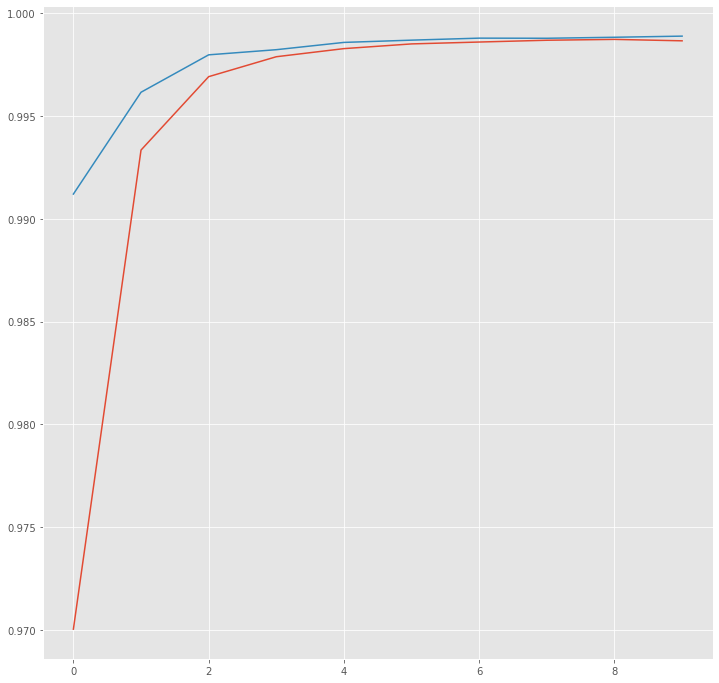

In [35]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.show()


In [36]:
y_pred = model.predict(
                        np.array(X_char_te).reshape((len(X_char_te),
                                                     max_len, max_len_char)))


In [37]:
y_pred[1]

array([[3.9943741e-05, 1.8112497e-02, 9.8184752e-01],
       [1.7106719e-05, 6.0757278e-03, 9.9390715e-01],
       [2.1197138e-05, 1.5815673e-02, 9.8416317e-01],
       [1.6907528e-05, 8.2747685e-03, 9.9170834e-01],
       [4.2534346e-05, 5.2456460e-03, 9.9471188e-01],
       [1.6567769e-04, 9.9800497e-01, 1.8293320e-03],
       [7.2796924e-05, 9.8159480e-01, 1.8332453e-02],
       [3.9142353e-05, 2.4532879e-02, 9.7542793e-01],
       [2.6610998e-05, 1.2065326e-02, 9.8790807e-01],
       [3.6429519e-05, 1.9053036e-02, 9.8091060e-01],
       [5.7651781e-05, 6.8175369e-03, 9.9312478e-01],
       [9.9939859e-01, 5.2519474e-04, 7.6203571e-05],
       [9.9978966e-01, 2.0152378e-04, 8.8305314e-06],
       [9.9992204e-01, 7.5326192e-05, 2.6756513e-06],
       [9.9997211e-01, 2.6536500e-05, 1.3129011e-06],
       [9.9998915e-01, 1.0068708e-05, 8.1943114e-07],
       [9.9999475e-01, 4.6804907e-06, 5.9709498e-07],
       [9.9999678e-01, 2.6868729e-06, 4.8095535e-07],
       [9.9999785e-01, 1.815

In [38]:
X_char_te[1][0]

array([30, 59, 41, 59, 59, 41, 82, 30, 59, 59])

In [39]:
def charindx2word(Tword):
    word = []
    for i in range(len(Tword)):
        if(Tword[i] !=0):
            word.append(idx2char[Tword[i]])
    return "".join(word)

In [40]:
i = 1000
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_char_te[i], y_te[i], p):
    if t != 0: #PAD
        print("{:15}: {:5} {}".format(charindx2word(w), idx2tag[t], idx2tag[pred]))


Word           ||True ||Pred
Üldseisnud     : text  text
rahuldav.S     : text  text
regulaarne     : object text
mm             : text  text
Hg.Vesikul     : text  text
hingamiska     : text  text
pehme,valu     : text  text


In [41]:
len(y_pred)

2729

### Wrong Tags


In [42]:
j = 0
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")

for i in range(len(y_pred)):
    p = np.argmax(y_pred[i], axis=-1)
    for w, t, pred in zip(X_char_te[i], y_te[i], p):
        if charindx2word(w) != "": #PAD
            if idx2tag[t] != idx2tag[pred]:
                print("{:15}: {:5} {}".format(charindx2word(w), idx2tag[t], idx2tag[pred]))
                j = j+1


Word           ||True ||Pred
puhtad.RR1     : object text
langeb         : text  object
ebaregulaa     : object text
Pikkus         : object text
157            : object text
Pikkus         : object text
165            : object text
170/110        : object text
p/s)RR-130     : object text
piim)RR-15     : object text
KORRAS.        : object text
KOORMUSTES     : object text
väga           : text  object
155/95         : object text
Pikkus-174     : object text
holter         : text  object
Nõustamine     : object text
suhtes.RR1     : object text
=              : text  object
105/60         : object text
2.3.RR         : object text
114/           : object text
kõikumised     : object text
140-90mmhg     : object text
130/82         : object text
130/95         : object text
sööki.RR-1     : object text
sööki-6,6m     : object text
regulaarne     : object text
Pikkus-        : object text
178            : object text
langeb         : text  object
kaebusteta     : object text
Holter   

150/90         : object text
140/70         : object text
ravim          : text  object
Pikkus         : object text
49cm.          : object text
monitoorin     : text  object
170cm          : object text
Pikkus-        : object text
174            : object text
min.RR         : object text
140/80         : object text
155.95         : object text
tervisetõe     : object text
kaal           : text  object
Pikkus-        : object text
175            : object text
kontroll-      : text  object
Pikkus-165     : object text
2.3.RR         : object text
114/           : object text
13-101035-     : object text
13-101035-     : object text
13-101035-     : object text
13-101035-     : object text
13-101035-     : object text
13-101035-     : object text
13-101035-     : object text
13-101035-     : object text
Pikkus         : object text
160            : object text
RR-le          : object text
sööki-6,3m     : object text
Pikkus-        : object text
163            : object text
Holter    

In [43]:
j

498

In [44]:
i = 1
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_char_te[i], y_te[i], p):
    if t != 0: #PAD
        print("{:15}: {:5} {}".format(charindx2word(w), idx2tag[t], idx2tag[pred]))


Word           ||True ||Pred
01.11.2011     : text  text
-              : text  text
118            : text  text
kg,164         : text  text
cm,BMI         : text  text
43,RR          : object object
150/90         : object object
mmHg,FR        : text  text
~125           : text  text
x´,ebaregu     : text  text
.              : text  text


In [45]:
from seqeval.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "text"))
        out.append(out_i)
    return out

def test2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p].replace("PAD", "text"))
        out.append(out_i)
    return out

pred_labels = pred2label(y_pred)
test_labels = test2label(y_te)

print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))
print(classification_report(test_labels, pred_labels))


F1-score: 89.5%
           precision    recall  f1-score   support

     text       0.92      0.88      0.90      4461
   object       0.95      0.83      0.88      2104

micro avg       0.93      0.86      0.89      6565
macro avg       0.93      0.86      0.89      6565



In [46]:
len(sentences)

13643

In [47]:
accuracy_score(test_labels, pred_labels)

0.9987834371564676

In [48]:
from sklearn_crfsuite.metrics import flat_classification_report,flat_accuracy_score
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)
print("Accuracy",flat_accuracy_score(y_pred=pred_labels, y_true=test_labels))

              precision    recall  f1-score   support

      object       0.97      0.89      0.93      3653
        text       1.00      1.00      1.00    405697

    accuracy                           1.00    409350
   macro avg       0.99      0.94      0.96    409350
weighted avg       1.00      1.00      1.00    409350

Accuracy 0.9987834371564676


In [49]:
len(sentences)